## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## READING CSV FILE

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\CC GENERAL.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.drop('CUST_ID',axis=1,inplace=True)

## DETECTING NULL VALUES

In [6]:
df.isnull().sum()/len(df)*100

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

## DROPPING NULL VALUES

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()/len(df)*100

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

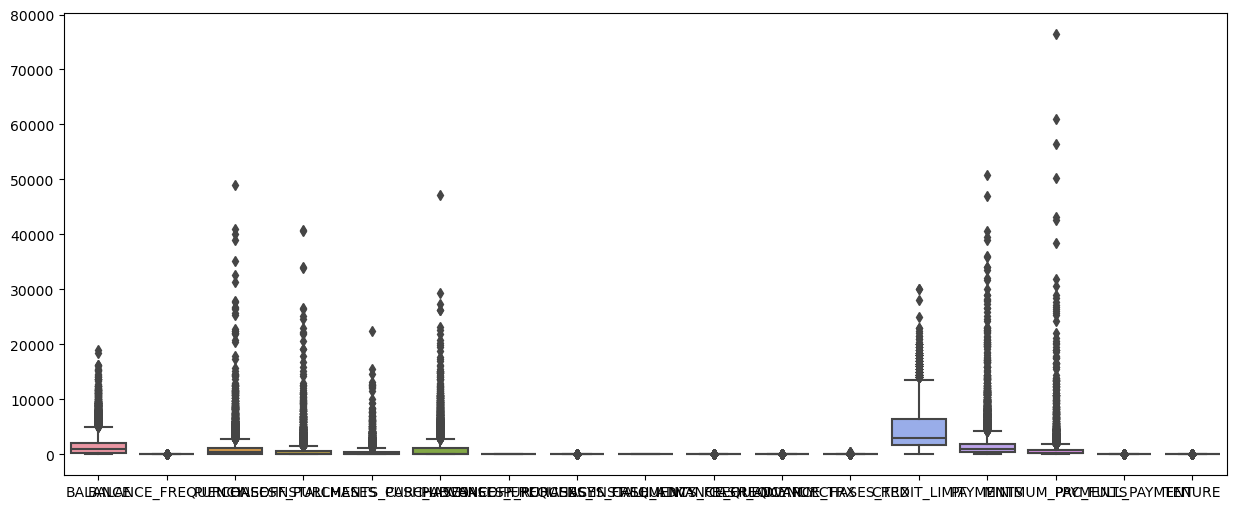

In [9]:
plt.figure(figsize=(15,6))
sns.boxplot(df)
plt.show()

In [10]:
def wisker(col):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return lower,upper

In [11]:
for i in df.select_dtypes(include=['number']).columns:
  lower,upper=wisker(i) 
  df[i]=np.where(df[i]<lower,lower,df[i])
  df[i]=np.where(df[i]>upper,upper,df[i])

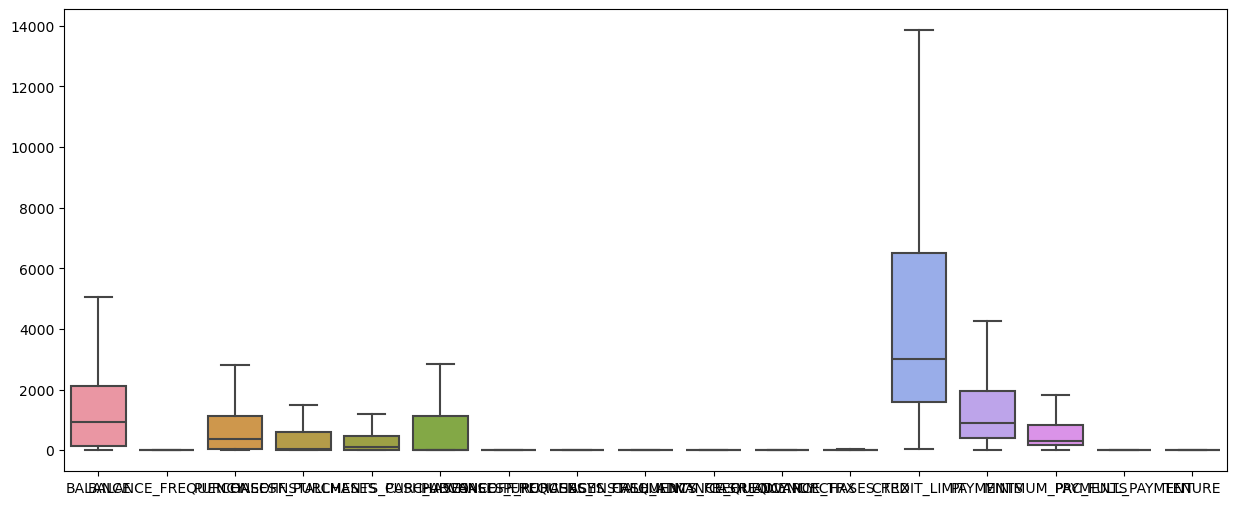

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(df)
plt.show()

## SCALING - MINMAX SCALER

In [13]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df_scaled=mms.fit_transform(df)

In [14]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [15]:
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.008114,0.2,0.034073,0.000000,0.078819,0.0,0.166667,0.0,0.083333,0.0,0.0,0.045977,0.068841,0.047472,0.077068,0.000000,0.0
1,0.635303,0.6,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.4,0.4,0.000000,0.503623,0.965415,0.592450,0.533332,0.0
2,0.494986,1.0,0.276142,0.516221,0.000000,0.0,1.000000,1.0,0.000000,0.0,0.0,0.275862,0.539855,0.146358,0.346560,0.000000,0.0
3,0.162218,1.0,0.005714,0.010683,0.000000,0.0,0.083333,0.1,0.000000,0.0,0.0,0.022989,0.083333,0.159598,0.135235,0.000000,0.0
4,0.359033,1.0,0.476189,0.000000,1.000000,0.0,0.666667,0.0,0.583333,0.0,0.0,0.183908,0.126812,0.329416,1.000000,0.000000,0.0


## CHECKING CORRELATION

In [16]:
df.corr()['CREDIT_LIMIT']

BALANCE                             0.494754
BALANCE_FREQUENCY                   0.102568
PURCHASES                           0.332327
ONEOFF_PURCHASES                    0.322281
INSTALLMENTS_PURCHASES              0.195020
CASH_ADVANCE                        0.260318
PURCHASES_FREQUENCY                 0.119609
ONEOFF_PURCHASES_FREQUENCY          0.295306
PURCHASES_INSTALLMENTS_FREQUENCY    0.060374
CASH_ADVANCE_FREQUENCY              0.132923
CASH_ADVANCE_TRX                    0.143485
PURCHASES_TRX                       0.254839
CREDIT_LIMIT                        1.000000
PAYMENTS                            0.446211
MINIMUM_PAYMENTS                    0.325464
PRC_FULL_PAYMENT                    0.028859
TENURE                                   NaN
Name: CREDIT_LIMIT, dtype: float64

In [96]:
X=df[['CREDIT_LIMIT','BALANCE']].values

In [97]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

## ELBOW GRAPH

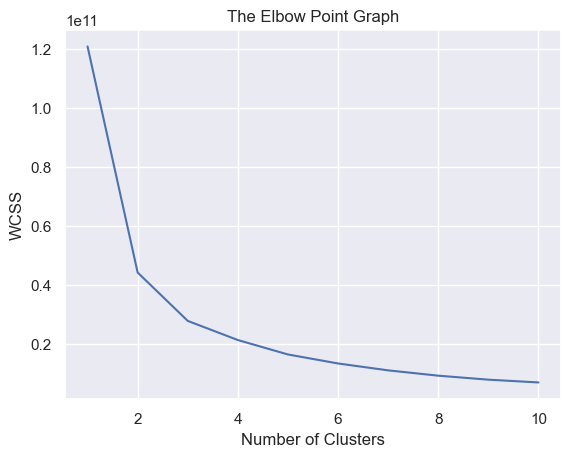

In [98]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [99]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X)

In [100]:
Y

array([0, 1, 1, ..., 0, 0, 0])

## FORMING CLUSTERS

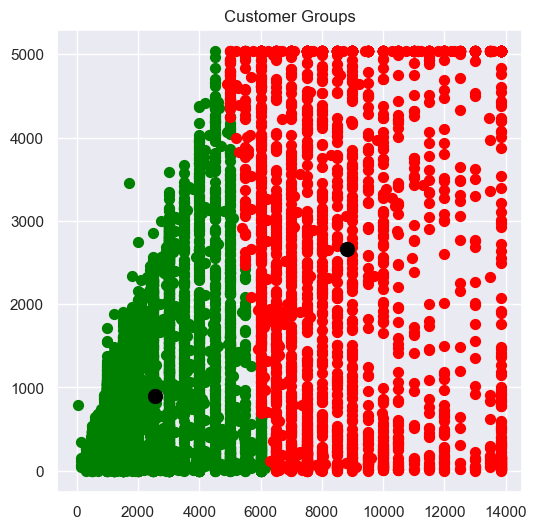

In [101]:
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
#plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='brown', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.show()

## CHECKING SCORE

In [102]:
from sklearn.metrics import silhouette_score

In [103]:
silhouette_score(X,Y)

0.5841151109654793

In [48]:
X1=df[['CREDIT_LIMIT','PRC_FULL_PAYMENT']].values

In [49]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X1)

    wcss.append(kmeans.inertia_)

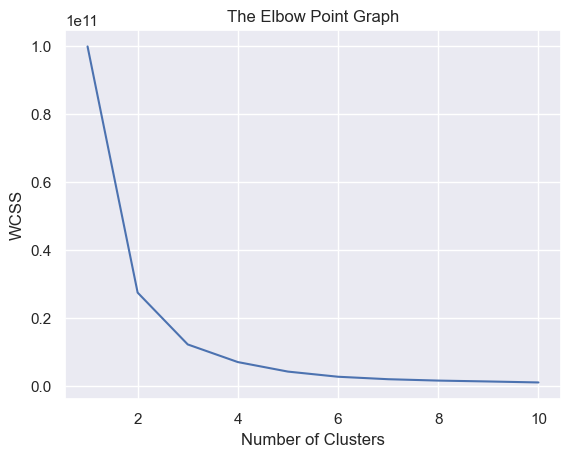

In [50]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X1)

In [52]:
Y

array([0, 1, 1, ..., 0, 0, 0])

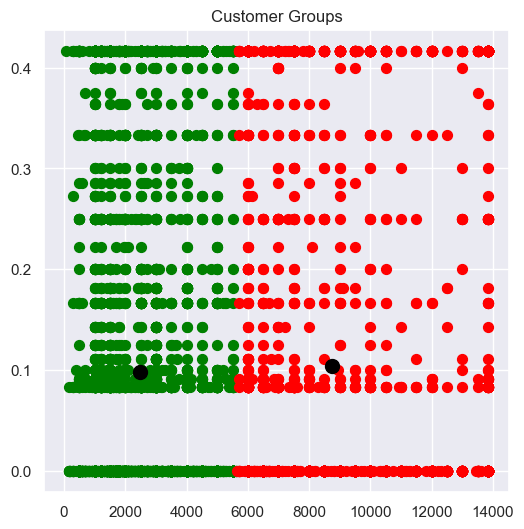

In [53]:
plt.figure(figsize=(6,6))
plt.scatter(X1[Y==0,0], X1[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X1[Y==1,0], X1[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.show()

In [54]:
silhouette_score(X1,Y)

0.6655892090336237

## PCA

In [55]:
from sklearn.decomposition import PCA

In [59]:
pca=PCA(n_components=2,random_state=42)

In [60]:
X_pca=pca.fit_transform(X)

In [61]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_pca)

    wcss.append(kmeans.inertia_)

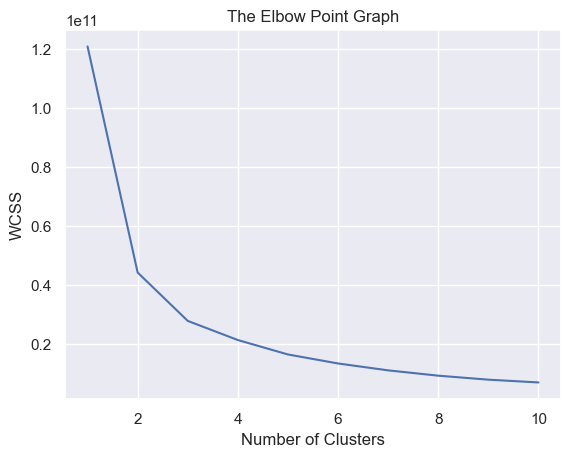

In [62]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X_pca)

In [64]:
Y

array([0, 2, 2, ..., 0, 0, 0])

In [65]:
silhouette_score(X_pca,Y)

0.5224838634452155